# Proyek Analisis Data : E-Commerce Public Dataset by Olist


*   Nama : Dela Puspita Lasminingrum
*   Email : delapuspitalasminingrum@gmail.com
*   ID Dicoding : delapuspital





## Menentukan Pertanyaan Bisnis

1.   Bagaimana pola penjualan yang terjadi selama setahun terakhir?
2.   Seberapa sering produk tiba sesuai dengan estimasi waktu pengiriman yang diberikan pada saat pesanan dibuat?
3. Bagaimana rata-rata review yang didapat setiap bulan?




## Menyiapkan library yang diperlukan



In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [74]:
order_df = pd.read_csv("/content/olist_orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [75]:
orderItems_df = pd.read_csv("/content/olist_order_items_dataset.csv")
orderItems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [76]:
review_df = pd.read_csv("/content/olist_order_reviews_dataset.csv")
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Assesing Data

*menilai data*


In [77]:
print (order_df.info(), '\n')
print (orderItems_df.info(), '\n')
print (review_df.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  

*apakah ada data null dari setiap dataframe?*

In [78]:
print('Data null order: \n', order_df.isnull().sum(), '\n')
print('Data null order items: \n', orderItems_df.isnull().sum(), '\n')
print('Data null review: \n', review_df.isnull().sum(), '\n')

Data null order: 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

Data null order items: 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

Data null review: 
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64 



*apakah ada data duplikat dalam setiap dataframe?*

In [79]:
print('Data duplikat order: \n', order_df.duplicated().sum(), '\n')
print('Data duplikat order items: \n', orderItems_df.duplicated().sum(), '\n')
print('Data duplikat review: \n', review_df.duplicated().sum(), '\n')

Data duplikat order: 
 0 

Data duplikat order items: 
 0 

Data duplikat review: 
 0 



*periksa ringkasan parameter statistik setiap dataframe*

In [80]:
print('Parameter statistik order: \n', order_df.describe(), '\n')
print('Parameter statistik order items: \n', orderItems_df.describe(), '\n')
print('Parameter statistik review: \n', review_df.describe(), '\n')

Parameter statistik order: 
                                 order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 

### Cleaning Data

*Terdapat missing values pada dataframe order, lebih tepatnya di bagian "delivered customer date" yang dimana variabel ini nanti cukup penting dalam visualasi data di akhir. Maka dari itu, kita lakukan dropping untuk missing value.*

In [81]:
order_df_cleaned = order_df.dropna(subset=['order_delivered_customer_date'])

In [82]:
print('Data null setelah drop: \n', order_df_cleaned.isnull().sum(), '\n')

Data null setelah drop: 
 order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      1
order_delivered_customer_date     0
order_estimated_delivery_date     0
dtype: int64 



In [83]:
print('Jumlah data setelah drop:', order_df_cleaned.shape[0])

Jumlah data setelah drop: 96476


## Exploratory Data Analysis (EDA)

**Eksplorasi data order untuk melihat pola penjualan**

*persiapan : setting kolom tanggal dalam format datetime dan filter untuk setahun terakhir.*

In [84]:
order_df_cleaned['order_purchase_timestamp'] = pd.to_datetime(order_df_cleaned['order_purchase_timestamp'])

<ipython-input-84-d77c7c5c2c4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_cleaned['order_purchase_timestamp'] = pd.to_datetime(order_df_cleaned['order_purchase_timestamp'])


*menambahkan kolom bulan*

In [85]:
order_df_cleaned['month'] = order_df_cleaned['order_purchase_timestamp'].dt.to_period('M')

<ipython-input-85-7464b2bb3759>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_cleaned['month'] = order_df_cleaned['order_purchase_timestamp'].dt.to_period('M')


*menggabungkan data order dengan order items*

In [86]:
orderItems_df = pd.merge(orderItems_df, order_df_cleaned[['order_id', 'month']], on='order_id', how='inner')

*hitung total penjualan dan pesanan per bulan*

In [87]:
monthly_sales = orderItems_df.groupby('month').agg(
    total_sales=('price', 'sum'),     # total penjualan per bulan
    total_orders=('order_id', 'count')  # total pesanan per bulan
).reset_index()

*ubah 'month' ke datetime*

In [88]:
monthly_sales['month'] = monthly_sales['month'].dt.to_timestamp()

**Eksplorasi data order untuk informasi kesesuaian estimasi pesanan**


*persiapan : setting kolom tanggal dalam format datetime*

In [89]:
order_df_cleaned['order_delivered_customer_date'] = pd.to_datetime(order_df_cleaned.loc[:, 'order_delivered_customer_date'])
order_df_cleaned['order_estimated_delivery_date'] = pd.to_datetime(order_df_cleaned.loc[:, 'order_estimated_delivery_date'])

<ipython-input-89-849da0d1f83e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_cleaned['order_delivered_customer_date'] = pd.to_datetime(order_df_cleaned.loc[:, 'order_delivered_customer_date'])
<ipython-input-89-849da0d1f83e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df_cleaned['order_estimated_delivery_date'] = pd.to_datetime(order_df_cleaned.loc[:, 'order_estimated_delivery_date'])


*Drop baris yang memiliki missing value*

In [90]:
order_df_cleaned = order_df_cleaned.dropna(subset=['order_delivered_customer_date'])

*hitung selisih waktu pengiriman*


In [91]:
order_df_cleaned['delivery_time_diff'] = (order_df_cleaned['order_estimated_delivery_date'] - order_df_cleaned['order_delivered_customer_date']).dt.days

*klasifikasi status pengiriman*

In [92]:
def classify_delivery_status(x):
    if x > 0:
        return 'Lebih Cepat'
    elif x == 0:
        return 'Tepat Waktu'
    else:
        return 'Terlambat'

order_df_cleaned['delivery_status'] = order_df_cleaned['delivery_time_diff'].apply(classify_delivery_status)
delivery_counts = order_df_cleaned['delivery_status'].value_counts()

**Eksplorasi data review untuk mengetahui rata-rata review yang didapat**

*persiapan : setting kolom tanggal dalam format datetime*

In [93]:
review_df['review_creation_date'] = pd.to_datetime(review_df['review_creation_date'])

*menghitung rata-rata skor review per bulan*

In [94]:
monthly_reviews = review_df.groupby(review_df['review_creation_date'].dt.to_period('M')).agg(
    avg_review_score=('review_score', 'mean')  # menghitung rata-rata skor review
).reset_index()
monthly_reviews['review_creation_date'] = monthly_reviews['review_creation_date'].dt.to_timestamp()

## Visualisasi Data

### Mengetahui pola penjualan

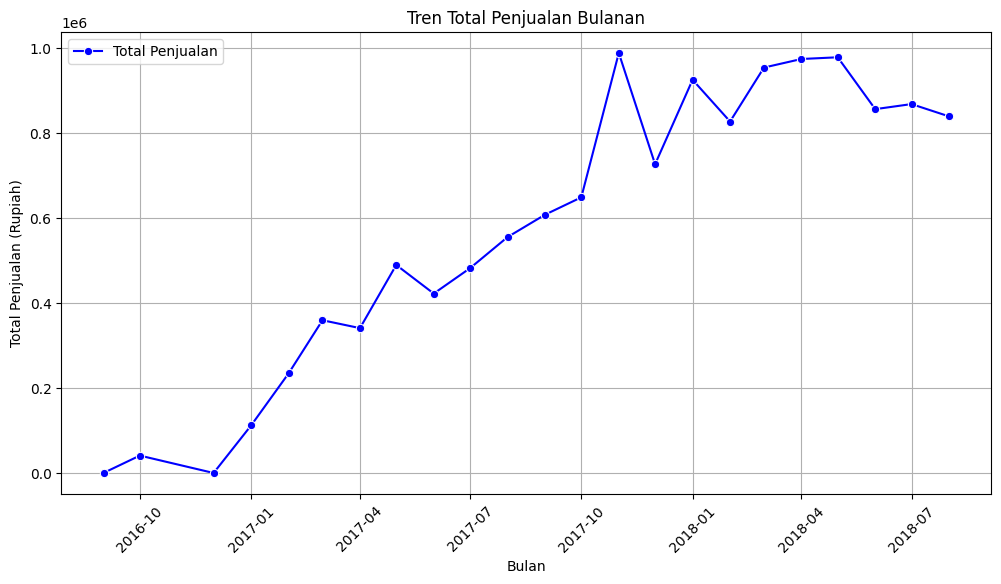

In [95]:
# Plot Total Penjualan Bulanan
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='month', y='total_sales', marker='o', color='b', label='Total Penjualan')
plt.title('Tren Total Penjualan Bulanan')
plt.xticks(rotation=45)
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan (Rupiah)')
plt.grid(True)
plt.legend()
plt.show()

### Mengetahui kesesuaian waktu dengan estimasi pengiriman

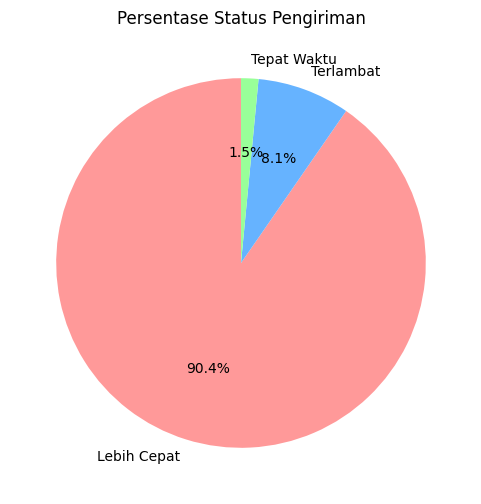

In [96]:
# Pie chart untuk persentase status pengiriman
plt.figure(figsize=(6, 6))
delivery_counts.plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'], startangle=90)
plt.title('Persentase Status Pengiriman')
plt.ylabel('')
plt.show()

### Mengetahui rata-rata review

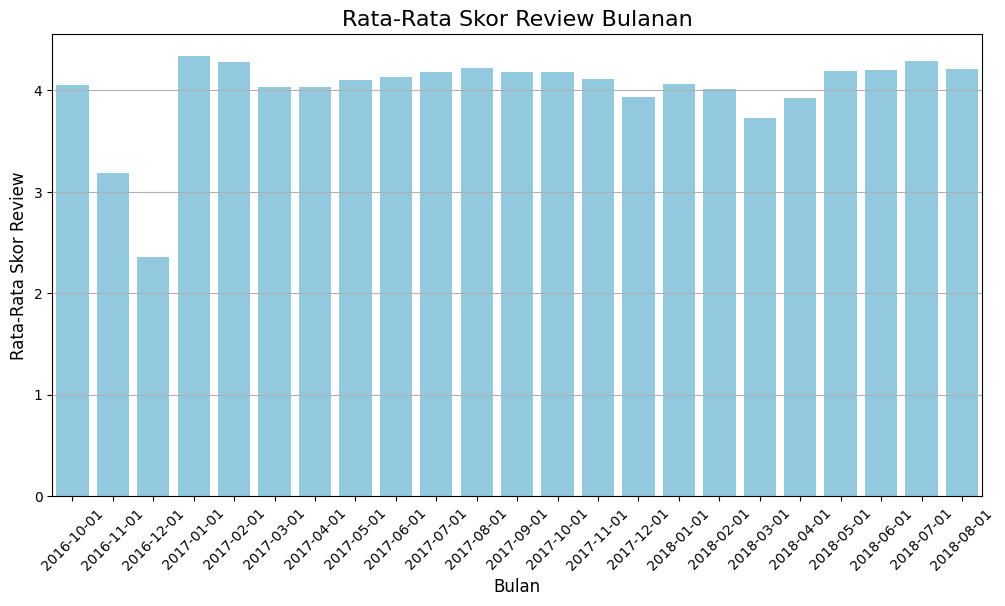

In [97]:
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_reviews, x='review_creation_date', y='avg_review_score', color='skyblue')
plt.title('Rata-Rata Skor Review Bulanan', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-Rata Skor Review', fontsize=12)
plt.grid(True, axis='y')
plt.show()

In [98]:
combined_df = pd.merge(order_df_cleaned, orderItems_df, on='order_id', how='inner')
combined_df = pd.merge(combined_df, review_df[['order_id', 'review_score', 'review_creation_date']], on='order_id', how='left')
combined_df.to_csv('combined_data.csv', index=False)

In [99]:
print(combined_df.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'month_x', 'delivery_time_diff', 'delivery_status', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'month_y', 'review_score', 'review_creation_date'],
      dtype='object')


## Conclusion

1. Dari visualisasi line chart yang telah dilakukan, terlihat bahwa selama setahun terakhir total penjualan mengalami fluktuasi dari bulan ke bulan, yang berarti angka penjualan yang tidak konsisten, mengalami penaikan dan penurunan pada bulan-bulan tertentu. Hal tersebut mungkin dipengaruhi adanya faktor momen-momen spesifik yang menerapkan promosi (seperti hari raya atau hari-hari besar tertentu). Analisis ini dapat dimanfaatkan untuk memahami kapan waktu-waktu terbaik melakukan penambahan stok barang.

2. Dari visualisasi pie chart yang telah dilakukan, terlihat proporsi kesesuaian waktu pengiriman (lebih cepat, tepat waktu, terlambat). Dari situ terlihat bahwa sebagian besar produk tiba lebih cepat dari estimasi waktu yang ditentukan. Namun terdapat juga beberapa yang terlambat dari estimasi waktu. hal tersebut membuktikan bahwa performa pengiriman sudah baik, namun tetap perlu diperhatikan kembali porsi keterlambatan agar tidak mempengaruhi kepuasan pelanggan.

3. Dari visualisasi bar chart yang telah dilakukan, terlihat bahwa rata-rata review yang didapatkan darai pelanggan berada dalam tingkat puas (range 4 ke 5). Hal tersebut menunjukkan performa penjualan yang lebih baik. Tetapi ada baiknya selalu memperhatikan skor review dari waktu ke waktu agar dapat menjadi sinyal bahwa segera lakukan evaluasi pada produk.